In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_iris

C:\Users\lukem\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [3]:
iris = load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
X = iris.data

In [6]:
y = iris.target

In [7]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [8]:
y = to_categorical(y) # one hot encode

In [9]:
y.shape

(150, 3)

In [10]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
X_train_s = scaler.transform(X_train)

In [17]:
X_test_s = scaler.transform(X_test)

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
model = Sequential()
model.add(Dense(8, input_dim = 4, activation='relu'))
model.add(Dense(8, input_dim = 4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train_s, y_train, epochs=150, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
100/100 [==============================] - 0s 2ms/step - loss: 1.1200 - accuracy: 0.3100
Epoch 2/150
100/100 [==============================] - 0s 50us/step - loss: 1.1111 - accuracy: 0.3900
Epoch 3/150
100/100 [==============================] - 0s 70us/step - loss: 1.1035 - accuracy: 0.3600
Epoch 4/150
100/100 [==============================] - 0s 60us/step - loss: 1.0954 - accuracy: 0.3600
Epoch 5/150
100/100 [==============================] - 0s 80us/step - loss: 1.0875 - accuracy: 0.3600
Epoch 6/150
100/100 [==============================] - 0s 60us/step - loss: 1.0800 - accuracy: 0.3600
Epoch 7/150
100/100 [==============================] - 0s 70us/step - loss: 1.0725 - accuracy: 0.3700
Epoch 8/150
100/100 [==============================] - 0s 70us/step - loss: 1.0645 - accuracy: 0.3800
Epoch 9/150
100/100 [==============================] - 0s 60us/step - loss: 1.0568 - accuracy: 0.3900
Epoch 10/150
100/100 [=============

In [22]:
predictions = model.predict_classes(X_test_s)

In [23]:
y_true = y_test.argmax(axis=1)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
confusion_matrix(y_true, predictions)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 16]], dtype=int64)

In [26]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

   micro avg       0.98      0.98      0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [27]:
accuracy_score(y_true, predictions)

0.98

In [28]:
model.save('LM_model1.h5')

In [29]:
from keras.models import load_model

In [30]:
new_model = load_model('LM_model1.h5')

 ## Text Gen with LSTMs

In [31]:
def read_file(filepath):
    with open(filepath) as f:
        str_text = f.read()
        
    return str_text

In [32]:
import spacy

In [33]:
nlp = spacy.load('en', disable=['parser', 'tagger', 'ner'])

In [34]:
nlp.max_length = 1198623

In [35]:
def separate_punc(doc_text):
    return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

In [36]:
d = read_file('moby_dick_four_chapters.txt')

In [37]:
tokens = separate_punc(d)

In [38]:
# pass in 25 words, and predict 26th word
train_len = 25 + 1
text_sequences =[]

for i in range(train_len, len(tokens)):
    seq = tokens[i-train_len:i]
    text_sequences.append(seq)

In [39]:
text_sequences[0]

['call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me',
 'on']

In [40]:
from keras.preprocessing.text import Tokenizer

In [41]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)

In [42]:
sequences = tokenizer.texts_to_sequences(text_sequences)

In [43]:
sequences[0] # replaced each sequence with IDs for words

[964,
 14,
 265,
 51,
 263,
 416,
 87,
 222,
 129,
 111,
 962,
 262,
 50,
 43,
 37,
 321,
 7,
 23,
 555,
 3,
 150,
 261,
 6,
 2704,
 14,
 24]

In [44]:
tokenizer.index_word[964]

'call'

In [45]:
tokenizer.word_counts

OrderedDict([('call', 27),
             ('me', 2471),
             ('ishmael', 133),
             ('some', 758),
             ('years', 135),
             ('ago', 84),
             ('never', 449),
             ('mind', 164),
             ('how', 321),
             ('long', 374),
             ('precisely', 37),
             ('having', 142),
             ('little', 767),
             ('or', 950),
             ('no', 1029),
             ('money', 120),
             ('in', 5647),
             ('my', 1812),
             ('purse', 71),
             ('and', 9646),
             ('nothing', 281),
             ('particular', 152),
             ('to', 6497),
             ('interest', 24),
             ('on', 1716),
             ('shore', 26),
             ('i', 7176),
             ('thought', 676),
             ('would', 702),
             ('sail', 104),
             ('about', 1014),
             ('a', 10377),
             ('see', 442),
             ('the', 15566),
             ('watery', 26),
  

In [46]:
vocabulary_size = len(tokenizer.word_counts)

In [47]:
vocabulary_size

2709

In [48]:
sequences = np.array(sequences)

In [49]:
sequences

array([[ 964,   14,  265, ..., 2704,   14,   24],
       [  14,  265,   51, ...,   14,   24,  965],
       [ 265,   51,  263, ...,   24,  965,    5],
       ...,
       [ 960,   12,  168, ...,  264,   53,    2],
       [  12,  168, 2703, ...,   53,    2, 2709],
       [ 168, 2703,    3, ...,    2, 2709,   26]])

In [50]:
X = sequences[:,:-1]

In [51]:
y = sequences[:,-1]

In [52]:
y = to_categorical(y, num_classes=vocabulary_size+1)

In [53]:
seq_len = X.shape[1]

In [54]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

In [55]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, seq_len, input_length=seq_len))
    model.add(LSTM(seq_len*4, return_sequences=True))
    model.add(LSTM(seq_len*4))
    model.add(Dense(seq_len*4, activation='relu'))
    model.add(Dense(vocabulary_size, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [56]:
model = create_model(vocabulary_size+1, seq_len)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 25)            67750     
_________________________________________________________________
lstm_1 (LSTM)                (None, 25, 100)           50400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 2710)              273710    
Total params: 482,360
Trainable params: 482,360
Non-trainable params: 0
_________________________________________________________________


In [57]:
from pickle import dump, load

In [83]:
%%time
model.fit(X, y, batch_size=128, epochs=200, verbose=1)

Epoch 1/200
11368/11368 [==============================] - 13s 1ms/step - loss: 5.6492 - accuracy: 0.0764
Epoch 2/200
11368/11368 [==============================] - 13s 1ms/step - loss: 5.5949 - accuracy: 0.0787
Epoch 3/200
11368/11368 [==============================] - 13s 1ms/step - loss: 5.5488 - accuracy: 0.0796
Epoch 4/200
11368/11368 [==============================] - 14s 1ms/step - loss: 5.4989 - accuracy: 0.0812
Epoch 5/200
11368/11368 [==============================] - 13s 1ms/step - loss: 5.4513 - accuracy: 0.0825
Epoch 6/200
11368/11368 [==============================] - 14s 1ms/step - loss: 5.4068 - accuracy: 0.0853
Epoch 7/200
11368/11368 [==============================] - 13s 1ms/step - loss: 5.3644 - accuracy: 0.0840
Epoch 8/200
11368/11368 [==============================] - 13s 1ms/step - loss: 5.3247 - accuracy: 0.0872
Epoch 9/200
11368/11368 [==============================] - 13s 1ms/step - loss: 5.2897 - accuracy: 0.0863
Epoch 10/200
11368/11368 [====================

11368/11368 [==============================] - 22s 2ms/step - loss: 0.7412 - accuracy: 0.8210
Epoch 153/200
11368/11368 [==============================] - 21s 2ms/step - loss: 0.7246 - accuracy: 0.8280
Epoch 154/200
11368/11368 [==============================] - 20s 2ms/step - loss: 0.7112 - accuracy: 0.8301
Epoch 155/200
11368/11368 [==============================] - 21s 2ms/step - loss: 0.6841 - accuracy: 0.8396
Epoch 156/200
11368/11368 [==============================] - 20s 2ms/step - loss: 0.6623 - accuracy: 0.8451
Epoch 157/200
11368/11368 [==============================] - 21s 2ms/step - loss: 0.6575 - accuracy: 0.8472
Epoch 158/200
11368/11368 [==============================] - 20s 2ms/step - loss: 0.6452 - accuracy: 0.8495
Epoch 159/200
11368/11368 [==============================] - 20s 2ms/step - loss: 0.6325 - accuracy: 0.8555
Epoch 160/200
11368/11368 [==============================] - 21s 2ms/step - loss: 0.6169 - accuracy: 0.8573
Epoch 161/200
11368/11368 [===============

In [84]:
# model.save('LM_moby_dick.h5') saved once immediately after training, commented to avoid accidental overwrite

In [85]:
# dump(tokenizer, open('LM_simpletokenizer', 'wb'))

In [58]:
from keras.preprocessing.sequence import pad_sequences

In [70]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    output_text = []
    
    input_text = seed_text
    
    for i in range(num_gen_words):
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        pred_word_ind = model.predict_classes(pad_encoded, verbose=0)[0]
        pred_word = tokenizer.index_word[pred_word_ind]
        input_text += ' ' + pred_word
        output_text.append(pred_word)
    
    return ' '.join(output_text)

In [61]:
model = load_model('LM_moby_dick.h5')
tokenizer = load(open('LM_simpletokenizer', 'rb'))

In [63]:
text_sequences[0]

['call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me',
 'on']

In [64]:
import random
random.seed(101)
random_pick = random.randint(0, len(text_sequences))
random_seed_text = text_sequences[random_pick]

In [65]:
random_seed_text

['and',
 'throwing',
 'the',
 'clothes',
 'to',
 'one',
 'side',
 'he',
 'really',
 'did',
 'this',
 'in',
 'not',
 'only',
 'a',
 'civil',
 'but',
 'a',
 'really',
 'kind',
 'and',
 'charitable',
 'way',
 'i',
 'stood',
 'looking']

In [66]:
seed_text = ' '.join(random_seed_text)

In [67]:
seed_text

'and throwing the clothes to one side he really did this in not only a civil but a really kind and charitable way i stood looking'

In [71]:
generate_text(model, tokenizer, seq_len, seed_text, 25)

"at him a moment for all his tattooings he was on the whole a clean comely looking cannibal what 's all this fuss i have"

In [72]:
model2 = load_model('epochBIG.h5')

In [73]:
tokenizer2 = load(open('epochBIG','rb'))

In [74]:
generate_text(model2, tokenizer2, seq_len, seed_text, 25)

"at that stubb ' my frame roman eyes of his own power for the whale 's grain to wrenched progeny for a fever drawn up"

### Chatbot

In [75]:
import pickle

In [76]:
with open('train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [77]:
with open('test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [78]:
len(train_data)

10000

In [79]:
len(test_data)

1000

In [80]:
train_data[0] #story, question, answer

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [81]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [82]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [83]:
train_data[0][2]

'no'

In [84]:
all_data = test_data + train_data

In [85]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [86]:
vocab = set()

for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [87]:
vocab.add("no")
vocab.add("yes")

In [88]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [89]:
vocab_len = len(vocab) + 1

In [90]:
all_story_lens = [len(data[0]) for data in all_data]

In [96]:
max_story_len = max(all_story_lens)
max_story_len

156

In [97]:
max_question_len = max([len(data[1]) for data in all_data])
max_question_len

6

In [98]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [99]:
tokenizer.word_index

{'.': 1,
 'to': 2,
 'bedroom': 3,
 'football': 4,
 'no': 5,
 'apple': 6,
 'kitchen': 7,
 'garden': 8,
 'moved': 9,
 'got': 10,
 'office': 11,
 'there': 12,
 'milk': 13,
 'left': 14,
 'the': 15,
 'bathroom': 16,
 'took': 17,
 'is': 18,
 'went': 19,
 'grabbed': 20,
 'dropped': 21,
 'travelled': 22,
 'down': 23,
 'john': 24,
 'yes': 25,
 'back': 26,
 'picked': 27,
 'discarded': 28,
 'mary': 29,
 'sandra': 30,
 'put': 31,
 'journeyed': 32,
 'hallway': 33,
 'daniel': 34,
 'in': 35,
 'up': 36,
 '?': 37}

In [100]:
train_story_text = []
train_question_text = []
train_answers = []

for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [102]:
train_story_text[:3]

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.']]

In [103]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [104]:
train_story_seq[:3]

[[29, 9, 2, 15, 16, 1, 30, 32, 2, 15, 3, 1],
 [29,
  9,
  2,
  15,
  16,
  1,
  30,
  32,
  2,
  15,
  3,
  1,
  29,
  19,
  26,
  2,
  15,
  3,
  1,
  34,
  19,
  26,
  2,
  15,
  33,
  1],
 [29,
  9,
  2,
  15,
  16,
  1,
  30,
  32,
  2,
  15,
  3,
  1,
  29,
  19,
  26,
  2,
  15,
  3,
  1,
  34,
  19,
  26,
  2,
  15,
  33,
  1,
  30,
  19,
  2,
  15,
  7,
  1,
  34,
  19,
  26,
  2,
  15,
  16,
  1]]

In [105]:
def vectorize_stories(data, word_index = tokenizer.word_index, 
                      max_story_len=max_story_len, max_question_len=max_question_len):
    X = []
    Xq = []
    Y = []
    
    for story, question, answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in question]
        
        y = np.zeros(len(word_index) + 1)
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    
    return (pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [106]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)

In [107]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)

In [108]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [109]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [110]:
vocab_size = len(vocab) + 1

In [111]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [112]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [113]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [114]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [115]:
match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [116]:
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [117]:
answer = concatenate([response, question_encoded])

In [119]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [121]:
answer = LSTM(32)(answer)

In [122]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [123]:
answer = Activation('softmax')(answer)

In [124]:
model = Model([input_sequence, question], answer)

In [125]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [126]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
____________________________________________________________________________________________

In [130]:
history = model.fit([inputs_train, questions_train], answers_train, batch_size=32, epochs=30, \
                    validation_data=([inputs_test, questions_test], answers_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/30
10000/10000 [==============================] - 6s 566us/step - loss: 0.6953 - accuracy: 0.4995 - val_loss: 0.6937 - val_accuracy: 0.5030
Epoch 2/30
10000/10000 [==============================] - 6s 569us/step - loss: 0.6950 - accuracy: 0.5042 - val_loss: 0.6933 - val_accuracy: 0.4860
Epoch 3/30
10000/10000 [==============================] - 6s 569us/step - loss: 0.6950 - accuracy: 0.4929 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 4/30
10000/10000 [==============================] - 6s 582us/step - loss: 0.6943 - accuracy: 0.4993 - val_loss: 0.6944 - val_accuracy: 0.4970
Epoch 5/30
10000/10000 [==============================] - 6s 602us/step - loss: 0.6940 - accuracy: 0.5071 - val_loss: 0.6941 - val_accuracy: 0.5110
Epoch 6/30
10000/10000 [==============================] - 6s 575us/step - loss: 0.6931 - accuracy: 0.5099 - val_loss: 0.6937 - val_accuracy: 0.5420
Epoch 7/30
10000/10000 [==============================] - 7s 66

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


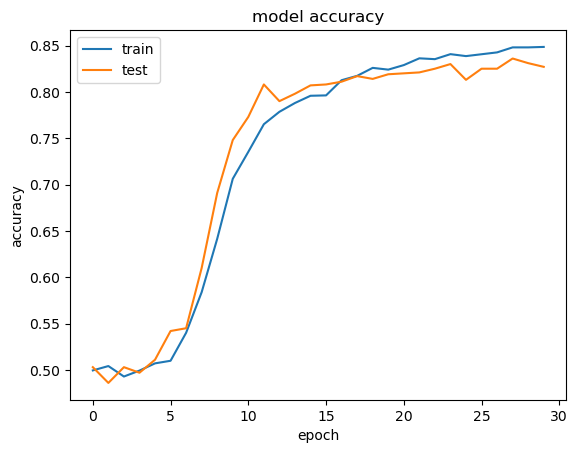

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [132]:
pred_results = model.predict(([inputs_test, questions_test]))

In [133]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print(k)
print(pred_results[0][val_max])

no
0.99936813


In [134]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [157]:
def ask_question(story_text, question_text, correct_answer):
    data = [(story_text.split(), question_text.split(), correct_answer)]
    story_vec, question_vec, answer_vec = vectorize_stories(data)
    pred_results = model.predict(([story_vec, question_vec]))
    pred_answer_index = np.argmax(pred_results[0])
    
    if pred_answer_index == 5:
        pred_answer = 'no'
    elif pred_answer_index == 25:
        pred_answer = 'yes'
    else:
        pred_answer = "neither yes nor no, so you've got a problem"
    
    print(f"The predicted answer is {pred_answer} with {round(pred_results[0][pred_answer_index]*100, ndigits=2)}% confidence.")

In [158]:
ask_question("John left the kitchen . Sandra dropped the football in the garden .", 
             "Is the football in the garden ?", "yes")

The predicted answer is yes with 89.22% confidence.


In [162]:
ask_question("John put the milk in the office . The apple got discarded in the hallway .",
             "Is the milk in the hallway ?", "no")

The predicted answer is yes with 56.38% confidence.
